當前工作目錄 ==> /home/jovyan/SSNP3D/0_dir
array([26.8, 27. , 27.2, ..., 39.4, 39.6, 39.8])
array([  0.2,   0.2,   0.2, ..., 111.8, 111.8, 111.8])
array([0.0591, 0.0792, 0.0888, ..., 0.2648, 0.2565, 0.2518])


Left Down point: 0.0 , 0.0
Right Up point:  39.8 , 111.8
height (min, max) 0.0 , 5.3581


Done


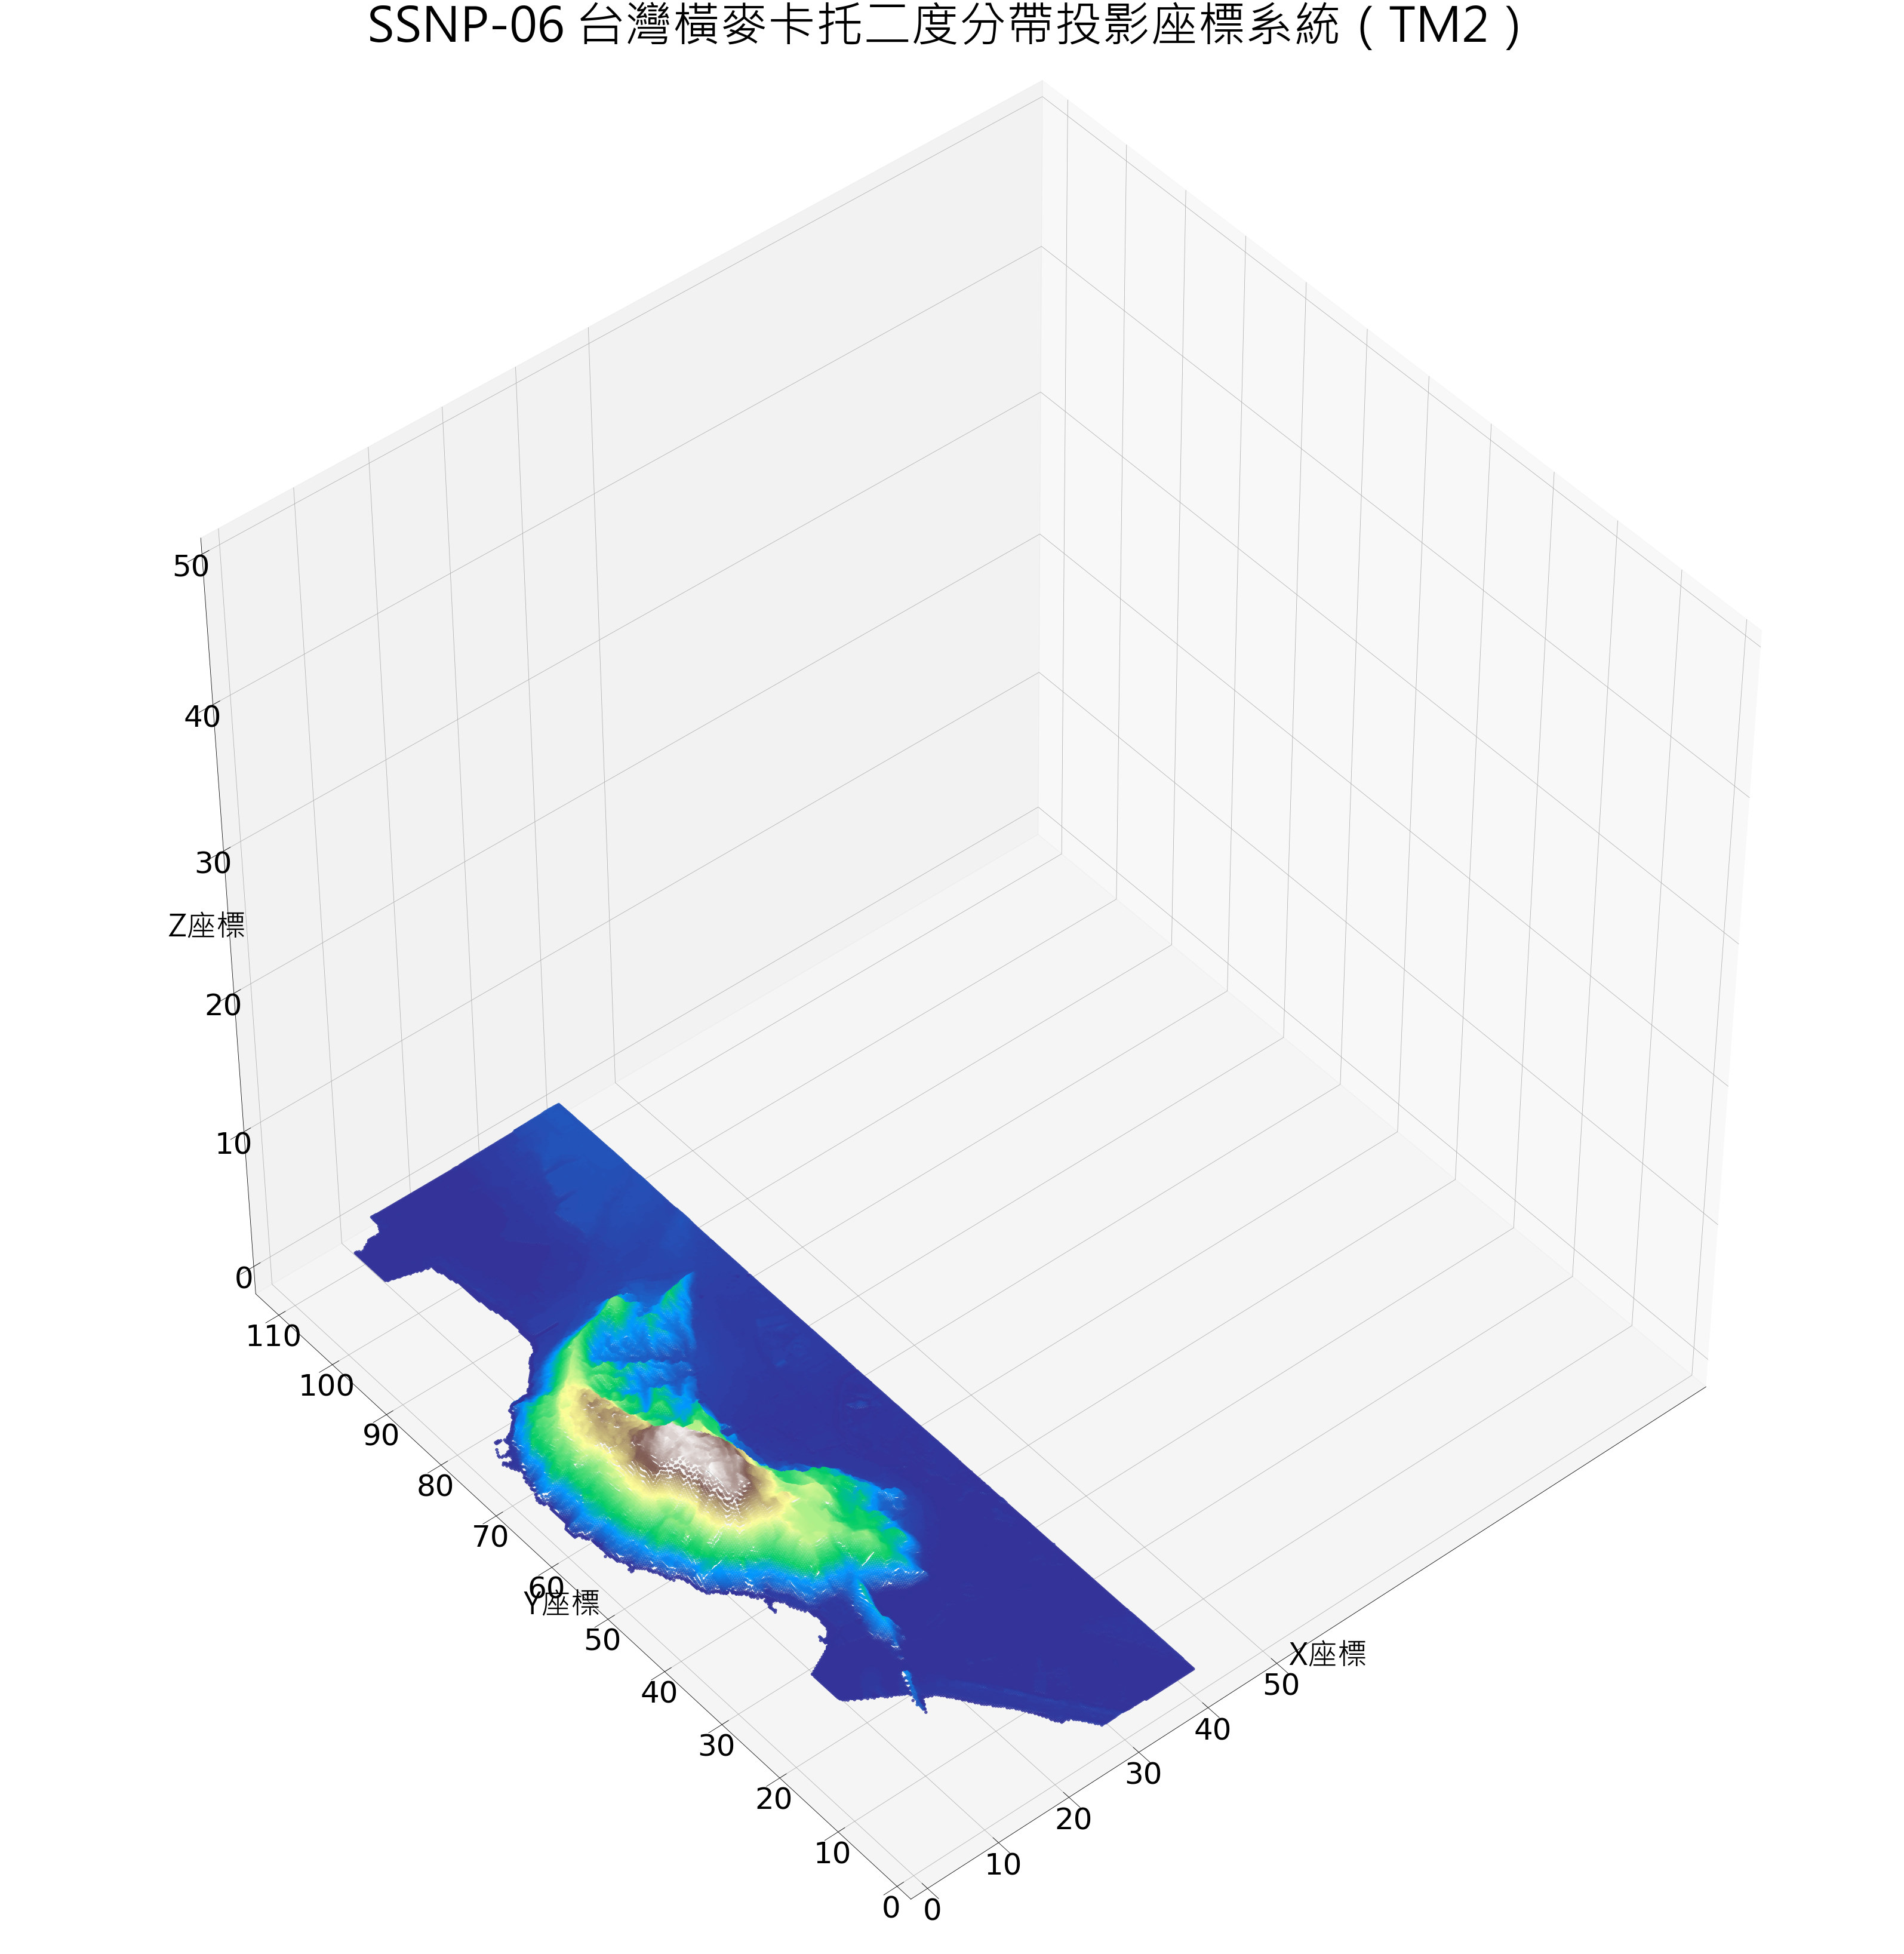

In [23]:
# SSNP-06.py
# 20121-11-15
#
# read dem_all-3.csv file
# x,y,z = np.loadtxt(path_data + 'dem_all-3.csv', unpack=True, delimiter=',',dtype='float') # transposed array, work for ',' delimeter
#
# https://gis.stackexchange.com/questions/66367/display-a-georeferenced-dem-surface-in-3d-matplotlib
# https://stackoverflow.com/questions/12904912/how-to-set-camera-position-for-3d-plots-using-python-matplotlib
# https://matplotlib.org/users/colormaps.html
# https://earthscience.stackexchange.com/questions/12057/how-to-interpolate-scattered-data-to-a-regular-grid-in-python
#
# run on myBinder.org JupyterLab
# 程式檔 path is '/home/jovyan/SSNP3D/0_dir'
# 資料檔 path is '/home/jovyan/SSNP3D/0_dir/data'
# 圖形檔 path is '/home/jovyan/SSNP3D/0_dir/graphic'
#
import os
path = os.getcwd()
print('當前工作目錄 ==>', path)
#
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fontManager
#
from mpl_toolkits.mplot3d.axes3d import *
from shutil import copyfile
from matplotlib import cm # colormap
from scipy.interpolate import griddata
from pprint import pprint
#
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin = 2.0   # cm
    right_margin = 2.0  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 2.0    # cm
    bottom_margin = 2.0 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
#
# end of def
#
matplotlib.rcParams['pdf.fonttype'] = 42
myfont = fontManager.FontProperties(fname='/home/jovyan/fonts/msjh.ttc')
# ----------------------------------------------------------------------
#
# Left Down point: 0.0 0.0
# Right Up point:  60.0 111.8
# height (min, max) -0.0453 5.3581
#
tup7 = set_graphic_area(112,112)
#
fig = plt.figure(figsize=(tup7[0], tup7[1]))
ax  = fig.add_subplot(1,1,1, projection='3d')
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
plt.xlim(0, 112)    # set xlim to xMinMax[0], xMinMax[1]
plt.ylim(0, 112)    # set ylim to yMinMax[0], yMinMax[1]
ax.set_zlim(-1,50)
#
x_ticks = [0,10,20,30,40,50]
y_ticks = [0,10,20,30,40,50,60,70,80,90,100,110]
#
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.tick_params(labelsize=50)
#
ax.set_xlabel('X座標', fontproperties=myfont, fontsize=50)
ax.set_ylabel('Y座標', fontproperties=myfont, fontsize=50)
ax.set_zlabel('Z座標', fontproperties=myfont, fontsize=50)
#
path_data    = './data/'
path_graphic = './graphic/'
#
# 逐筆讀入資料 dem_all-3.csv (91584 row)
# Read from the file into the array data(:,:)
# array data shape is (91584, 3)
#
# Columns:
# data[..., 0] is array of float number  # 二度分帶 X座標
# data[..., 1] is array of float number  # 二度分帶 Y座標
# data[..., 2] is array of float number  # DEM z value
#
# 台灣橫麥卡托二度分帶投影座標系統（TM2）
# TM2_X 二度分帶 X座標
# TM2_Y 二度分帶 Y座標
# TM2_Z DEM file z value, float type
#
function_float_convertTo_int = np.vectorize(np.int32)
#
TM2_X,TM2_Y,TM2_Z = np.loadtxt(path_data + 'dem_all-3.csv', unpack=True, delimiter=',',dtype='float')
pprint(TM2_X)
pprint(TM2_Y)
pprint(TM2_Z)
print('\n')

data3 = np.loadtxt(path_data + 'dem_all-3.csv', delimiter=',',dtype='float')
min_item = np.amin(data3, axis=0) # axis=0 --> min of each column
max_item = np.amax(data3, axis=0) # axis=0 --> max of each column
print ('Left Down point:',  min_item[0], ',', min_item[1])
print ('Right Up point: ' , max_item[0], ',', max_item[1])
print ('height (min, max)', min_item[2], ',', max_item[2])
print ('\n')
#
ax.scatter3D(TM2_X, TM2_Y, TM2_Z, c=TM2_Z, cmap=plt.cm.terrain, alpha=0.8)   # good
# ax.scatter3D(TM2_X, TM2_Y, TM2_Z, c=TM2_Z, cmap=plt.cm.jet, alpha=0.8)     # good
# ax.view_init(elev=45, azim=-110) # view_init(elev,azim)两个参数
# ax.view_init(elev=26, azim=230)
ax.view_init(elev=45, azim=230)
#
plt.draw()
#
# 設定子圖的標題
ax.set_title('SSNP-06 台灣橫麥卡托二度分帶投影座標系統（TM2）', fontproperties=myfont, fontsize=80)
#
# bbox_inches='tight' is for display ylabel
# plt.savefig(path_graphic + "Hipparcos-02.png",format="png",dpi=72, bbox_inches='tight')
plt.savefig(path_graphic + "SSNP-06.pdf", dpi=300, bbox_inches='tight')
#
print ('Done')